# Credit Card Approval Risk Predictor  
Banks receive a lot of applications for issuance of credit cards. Many of them rejected for many reasons, like high-loan balances, low-income levels, or too many inquiries on an individual’s credit report. Manually analyzing these applications is error-prone and a time-consuming process. This task can be automated with the power of machine learning, In this project, we will be build an automatic credit card approval risk predictor using machine learning techniques, just like the real banks do.
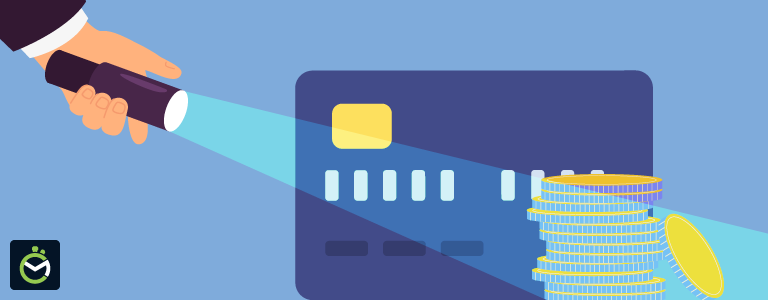

1. ID: Unique Id of the row  
2. CODE_GENDER: Gender of the applicant. M is male and F is female.  
3. FLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.  
4. FLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.  
5. CNT_CHILDREN: Count of children.  
6. AMT_INCOME_TOTAL: the amount of the income.  
7. NAME_INCOME_TYPE: The type of income (5 types in total).  
8. NAME_EDUCATION_TYPE: The type of education (5 types in total).  
9. NAME_FAMILY_STATUS: The type of family status (6 types in total).  
10. DAYS_BIRTH: The number of the days from birth (Negative values).  
11. DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.  
12. FLAG_MOBIL: Is an applicant with a mobile. 1 is True and 0 is False.  
13. FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.  
14. FLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.    
15. FLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.  
16. OCCUPATION_TYPE: The type of occupation (19 types in total). This column has missing values.  
17. CNT_FAM_MEMBERS: The count of family members.  


This is a csv file with credit record for a part of ID in application record. We can treat it a file to generate labels for modeling. For the applicants who have a record more than 59 past due, they should be rejected.

After reading the data, we have the following columns.

1. ID: Unique Id of the row in application record.
2. MONTHS_BALANCE: The number of months from record time.
3. STATUS: Credit status for this month.  
  X: No loan for the month  
  C: paid off that month   
  0: 1-29 days past due   
  1: 30-59 days past due   
  2: 60-89 days overdue  
  3: 90-119 days overdue   
  4: 120-149 days overdue   
  5: Overdue or bad debts, write-offs for more than 150 days   

In this project, we’ll be using Credit Card Approval Dataset. The structure of our project will be as follows:
1. To get a basic introduction of our project & What’s the business problem associated with it ?
2. We’ll start by loading and viewing the dataset.
3. To manipulate data, if there are any missing entries in the dataset.
4. To perform exploratory data analysis (EDA) on our dataset.
5. To pre-process data before applying machine learning model to the dataset.
6. To apply machine learning models that can predict if an individual’s application for a credit card will be accepted or not.

In [1]:
!pip install missingno

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
# data processing, CSV file I/O (e.g. pd.read_csv)

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.offline as pyo
from plotly import tools
import seaborn as sns
import missingno as msno 
#for visualizing missing data

In [3]:
data = pd.read_csv(r"C:\Users\anxaa\OneDrive\Documents\My Project Datasets\Credit Card Approval Risk Predictor\application_record.csv")
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
data.describe(include="all")

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
count,4.385570e+05,438557,438557,438557,438557.000000,4.385570e+05,438557,438557,438557,438557,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,304354,438557.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,294440,275459,304074,NaN,NaN,226104,301821,299828,393831,NaN,NaN,NaN,NaN,NaN,NaN,78240,NaN
mean,6.022176e+06,NaN,NaN,NaN,0.427390,1.875243e+05,NaN,NaN,NaN,NaN,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,NaN,2.194465
std,5.716370e+05,NaN,NaN,NaN,0.724882,1.100869e+05,NaN,NaN,NaN,NaN,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,NaN,0.897207
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.609375e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,6.047745e+06,NaN,NaN,NaN,0.000000,1.607805e+05,NaN,NaN,NaN,NaN,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,6.456971e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [5]:
print("Number of datapoints for application records: {}".format(len(data)))
print("Number of unique clients in dataset: {}".format(len(data.ID.unique())))

Number of datapoints for application records: 438557
Number of unique clients in dataset: 438510


The number of application records & the unique ID's are not same which depicts the values must be duplicated.

In [6]:
records = pd.read_csv(r"C:\Users\anxaa\OneDrive\Documents\My Project Datasets\Credit Card Approval Risk Predictor\credit_record.csv")
records

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [7]:
print("Number of datapoints for credit records: {}".format(len(records)))
print("Number of unique clients in dataset: {}".format(len(records.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


#### **Before removing duplicated data**

In [8]:
len(set(records['ID']).intersection(set(data['ID'])))

36457

The number of unique ids in the two datasets is not equal. There are fewer customers than applications in the credit record dataset. The intersection is 36,457 customers.

#### **After removing duplicated data**

In [9]:
data.iloc[:,1:].duplicated().sum()

348472

In [10]:
data.duplicated().sum()

0

In [11]:
print(f'Duplicates in applications data: {data.iloc[:,1:].duplicated().sum()}, ({np.round(100*data.iloc[:,1:].duplicated().sum()/len(data),1)}%)')
print('')
print(f'Duplicates in records data: {records.duplicated().sum()},  ({np.round(100*records.duplicated().sum()/len(records),1)}%)')

Duplicates in applications data: 348472, (79.5%)

Duplicates in records data: 0,  (0.0%)


#### **Drop duplicates**

In [12]:
# Drop duplicates
data=data.drop_duplicates(subset=data.columns[1:], keep='first')

In [13]:
data.shape

(90085, 18)

In [14]:
len(set(records['ID']).intersection(set(data['ID'])))

9709

The number of unique ids in the two datasets is not equal. There are fewer customers than applications in the credit record dataset. The intersection is 9709 customers.

#### **Finding the Cardinality in the data**
Cardinality refers to the distinctiveness or uniqueness of values in a dataset or database column. It represents the number of unique values in a column or a set of columns.

In [15]:
for col in data.columns:
    print(col,data[col].nunique())

ID 90085
CODE_GENDER 2
FLAG_OWN_CAR 2
FLAG_OWN_REALTY 2
CNT_CHILDREN 12
AMT_INCOME_TOTAL 866
NAME_INCOME_TYPE 5
NAME_EDUCATION_TYPE 5
NAME_FAMILY_STATUS 5
NAME_HOUSING_TYPE 6
DAYS_BIRTH 16379
DAYS_EMPLOYED 9406
FLAG_MOBIL 1
FLAG_WORK_PHONE 2
FLAG_PHONE 2
FLAG_EMAIL 2
OCCUPATION_TYPE 18
CNT_FAM_MEMBERS 13


In [16]:
[(col, data[col].nunique()) for col in data.columns]

[('ID', 90085),
 ('CODE_GENDER', 2),
 ('FLAG_OWN_CAR', 2),
 ('FLAG_OWN_REALTY', 2),
 ('CNT_CHILDREN', 12),
 ('AMT_INCOME_TOTAL', 866),
 ('NAME_INCOME_TYPE', 5),
 ('NAME_EDUCATION_TYPE', 5),
 ('NAME_FAMILY_STATUS', 5),
 ('NAME_HOUSING_TYPE', 6),
 ('DAYS_BIRTH', 16379),
 ('DAYS_EMPLOYED', 9406),
 ('FLAG_MOBIL', 1),
 ('FLAG_WORK_PHONE', 2),
 ('FLAG_PHONE', 2),
 ('FLAG_EMAIL', 2),
 ('OCCUPATION_TYPE', 18),
 ('CNT_FAM_MEMBERS', 13)]

In [17]:
unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [18]:
unique_counts = pd.DataFrame.from_records([(col, records[col].nunique()) for col in records.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [19]:
data["FLAG_MOBIL"].unique()

array([1], dtype=int64)

From the above observations it was observed that "FLAG_MOBIL" is having only one value in the entire column which indicates that there is a singularity in the data in that particular column. So this values are going to be the same no matter whichever customer is taken into consideration. We can try to eliminate this variable as the values are not changing so contribution of this variable is quite negligible.

In [20]:
data.drop(["FLAG_MOBIL"],axis=1,inplace=True)

In [21]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0


In [22]:
data.shape

(90085, 17)

## **Handling Missing Values**
Missing values can pose challenges when working with data, as they can affect data integrity, accuracy, and validity of analysis or modeling results. It is important to handle missing values appropriately in order to avoid biased or incomplete analysis.

In [23]:
data.isnull().sum()/len(data)*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.501193
CNT_FAM_MEMBERS         0.000000
dtype: float64

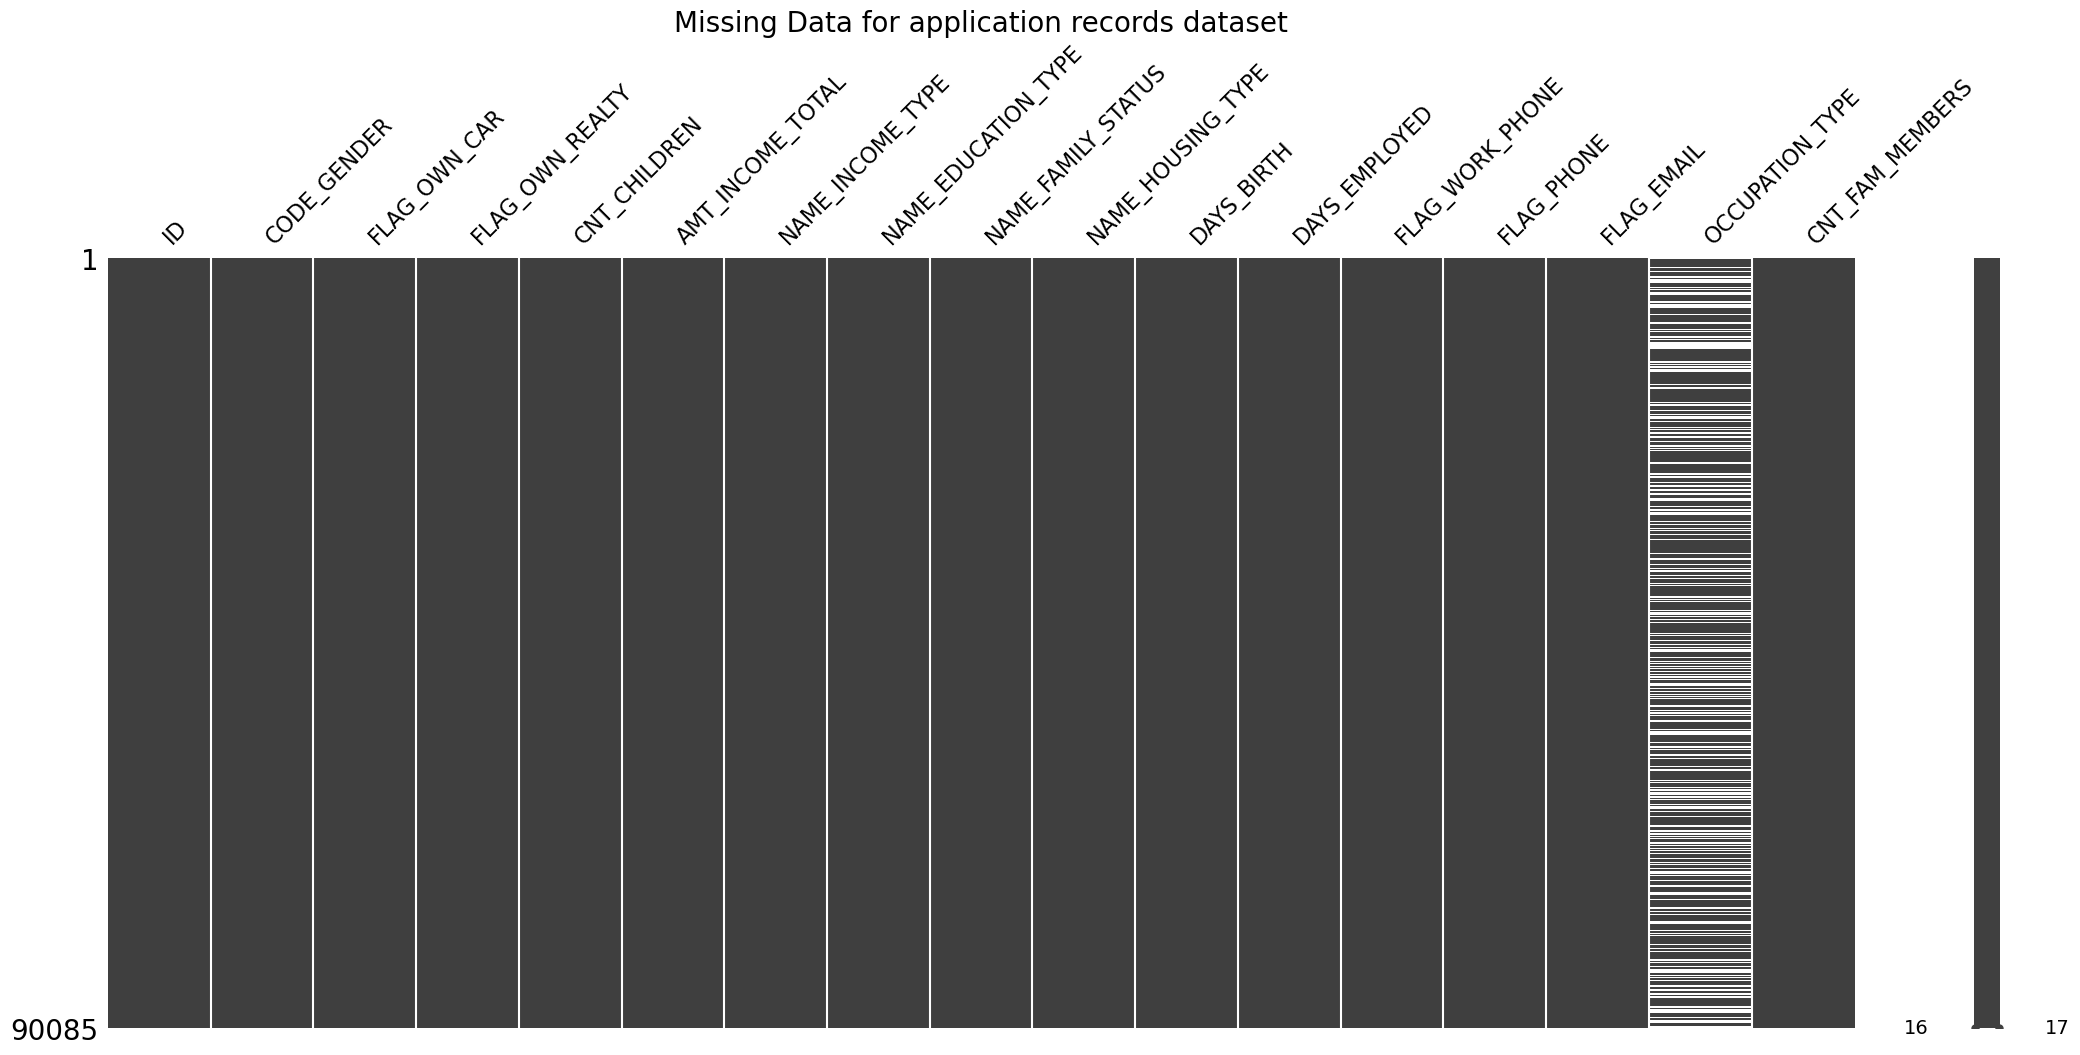

In [24]:
missing = msno.matrix(data)
missing.set_title("Missing Data for application records dataset",fontsize=20);

As we can observe from above that "OCCUPATION_TYPE" is the only column from appplications data having large set of missing values.Appropriate handling of missing values can help ensure the integrity and accuracy of data analyses and modeling results.

In [25]:
records.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

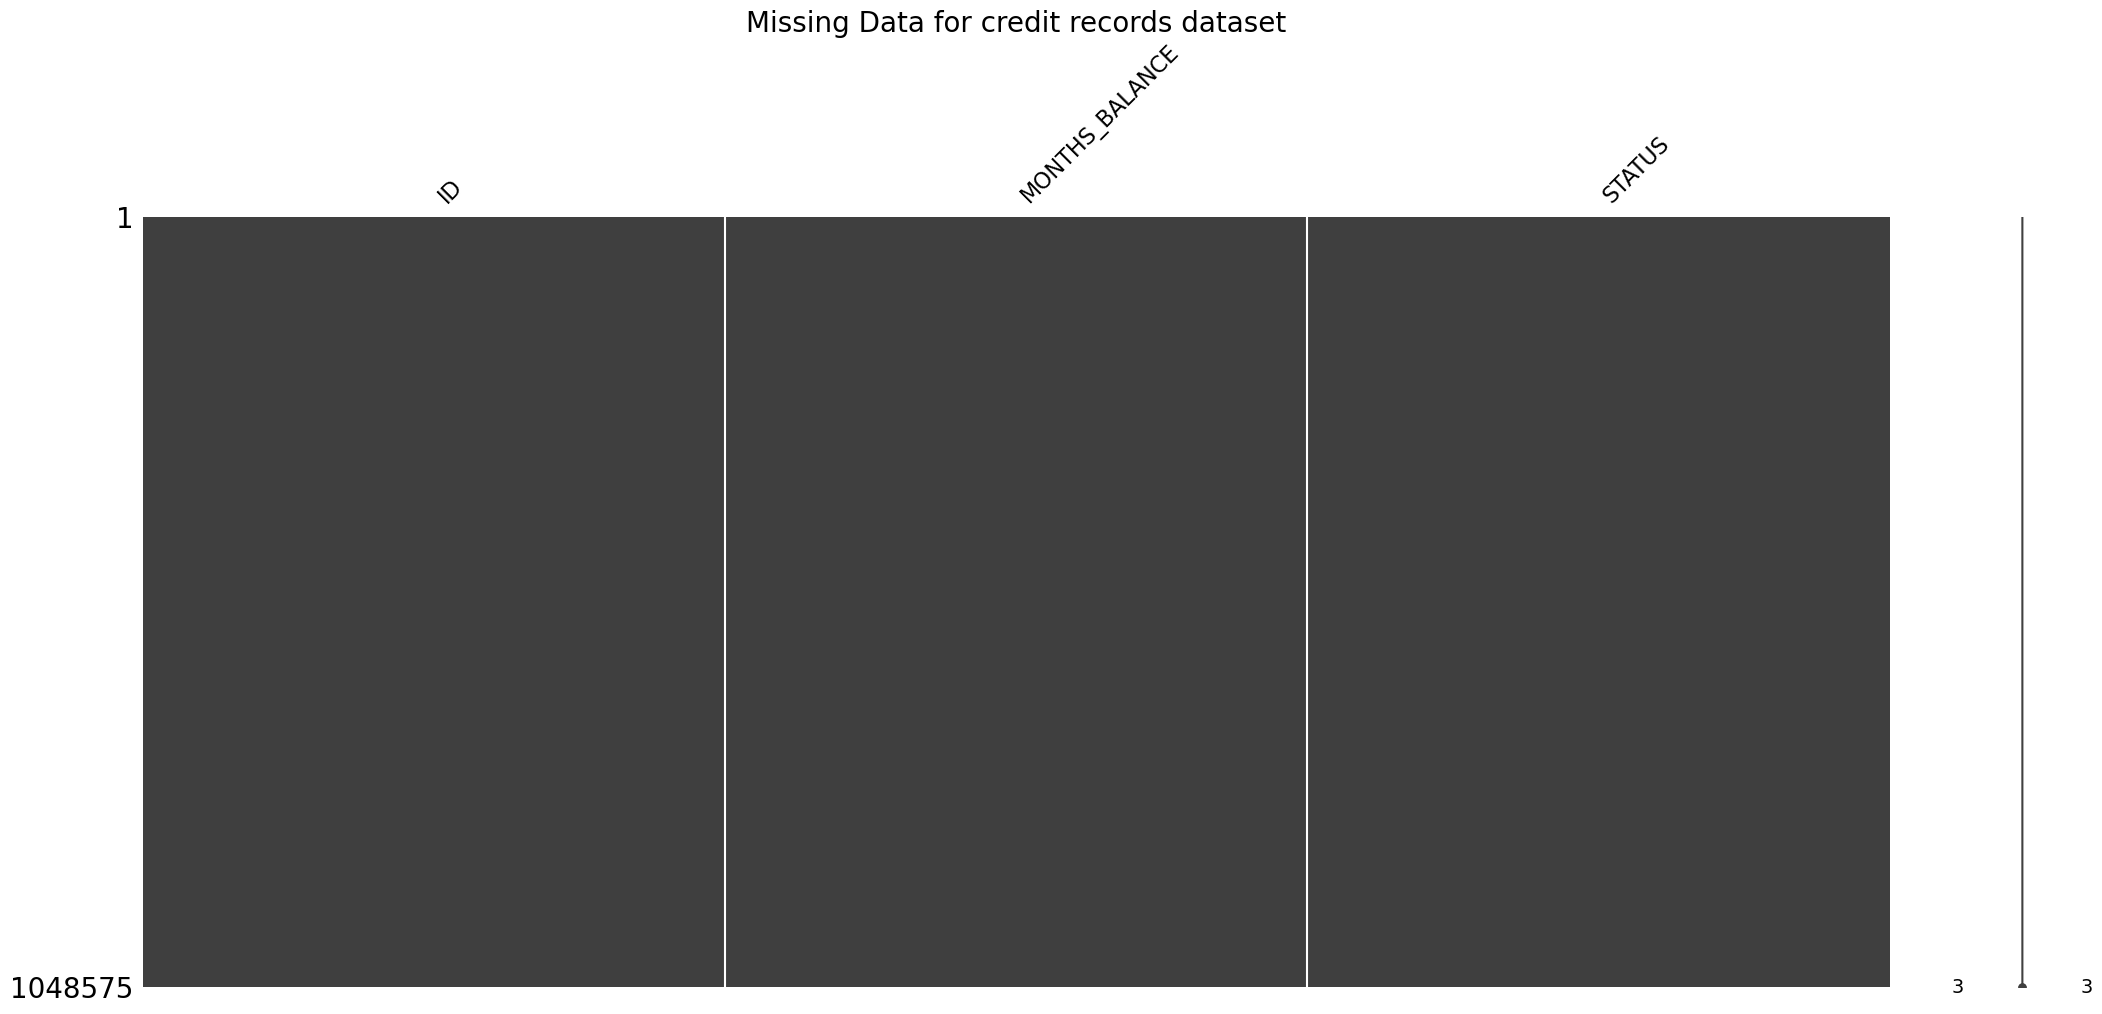

In [26]:
missing2 = msno.matrix(records)

missing2.set_title("Missing Data for credit records dataset",fontsize=20);

In [27]:
data['OCCUPATION_TYPE'].value_counts()/len(data)*100

OCCUPATION_TYPE
Laborers                 18.453683
Sales staff              10.127102
Core staff                8.981517
Managers                  7.409669
Drivers                   6.504968
High skill tech staff     3.726481
Accountants               3.367930
Medicine staff            2.757396
Cooking staff             1.958151
Security staff            1.931509
Cleaning staff            1.356497
Private service staff     0.832547
Low-skill Laborers        0.631626
Secretaries               0.457346
Waiters/barmen staff      0.436255
Realty agents             0.241994
HR staff                  0.185380
IT staff                  0.138758
Name: count, dtype: float64

In [28]:
# Fill missing values
data['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)

As droping the missing values completely can lead to huge data loss. So instead of dropping we will try to fill the missing values as "Other", so the data loss can also be prevented & missing values will also get handled appropriately.


In [29]:
data.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [30]:
records.STATUS.value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

#### **Converting data in proper format**

In [31]:
records.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [32]:
# target=1 (high risk) if there is at least 
#one month where user is late on payments by 30 days or more

records['target']=records['STATUS']
records['target'].replace('X', 0, inplace=True)
records['target'].replace('C', 0, inplace=True)
records['target']=records['target'].astype(int)
records.loc[records['target']>=1,'target'] = 1
records

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [33]:
records.target.value_counts()

target
0    1034381
1      14194
Name: count, dtype: int64

In [34]:
print("Number of datapoints for application records: {}".format(len(records)))
print("Number of unique clients in dataset: {}".format(len(records.ID.unique())))

Number of datapoints for application records: 1048575
Number of unique clients in dataset: 45985


In [35]:
records.head(20)

,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
5,5001712,-1,C,0
6,5001712,-2,C,0
7,5001712,-3,C,0
8,5001712,-4,C,0
9,5001712,-5,C,0


In [36]:
df=pd.DataFrame(records.groupby(['ID'])['target'].agg(max)).reset_index()

In [37]:
df.head()

,ID,target
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [38]:
df.target.value_counts()

target
0    40635
1     5350
Name: count, dtype: int64

In [39]:
new_df=pd.merge(data, df, how='inner', on=['ID'])

In [40]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,0,0,0,Laborers,2.0,1
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,0,Other,2.0,1
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,0,0,0,Other,2.0,1
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1


In [41]:
new_df.shape

(9709, 18)

In [42]:
# Extracting how many months account has been open for
start_df=pd.DataFrame(records.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

# Rename column
start_df.rename(columns={'MONTHS_BALANCE':'ACCOUNT_LENGTH'}, inplace=True)

# Make entries positive
start_df['ACCOUNT_LENGTH']=-start_df['ACCOUNT_LENGTH']

In [43]:
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [44]:
# Merge dataframes on ID
new_df=pd.merge(new_df, start_df, how='inner', on=['ID'])

In [45]:
new_df.shape

(9709, 19)

In [46]:
new_df.describe(include="all")

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH
count,9.709000e+03,9709,9709,9709,9709.000000,9.709000e+03,9709,9709,9709,9709,9709.000000,9709.000000,9709.000000,9709.000000,9709.000000,9709,9709.000000,9709.000000,9709.000000
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,Other,NaN,NaN,NaN
freq,NaN,6323,6139,6520,NaN,NaN,4960,6761,6530,8684,NaN,NaN,NaN,NaN,NaN,2994,NaN,NaN,NaN
mean,5.076105e+06,NaN,NaN,NaN,0.422804,1.812282e+05,NaN,NaN,NaN,NaN,-15991.811618,61732.846328,0.217427,0.287671,0.087548,NaN,2.182614,0.132145,27.270059
std,4.080270e+04,NaN,NaN,NaN,0.767019,9.927731e+04,NaN,NaN,NaN,NaN,4246.224468,139656.322958,0.412517,0.452700,0.282650,NaN,0.932918,0.338666,16.648057
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000
25%,5.036955e+06,NaN,NaN,NaN,0.000000,1.125000e+05,NaN,NaN,NaN,NaN,-19565.000000,-2995.000000,0.000000,0.000000,0.000000,NaN,2.000000,0.000000,13.000000
50%,5.069449e+06,NaN,NaN,NaN,0.000000,1.575000e+05,NaN,NaN,NaN,NaN,-15611.000000,-1374.000000,0.000000,0.000000,0.000000,NaN,2.000000,0.000000,26.000000
75%,5.112986e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12440.000000,-339.000000,0.000000,1.000000,0.000000,NaN,3.000000,0.000000,41.000000


In [47]:
data["DAYS_BIRTH"]

0        -12005
2        -21474
3        -19110
7        -22464
10       -16872
          ...  
438541   -13510
438545   -18832
438547   -10966
438552   -22717
438553   -15939
Name: DAYS_BIRTH, Length: 90085, dtype: int64

As you can see that "DAYS_BIRTH" column is giving the information about the age of individual,but here it's not in a proper format . So we will try to convert it into a proper form to make it more understandable.

In [48]:
# Create age feature
new_df['AGE_YEARS']=round(-new_df['DAYS_BIRTH']/365.2425,0)
#The number 365.2425 is used because it represents the average length of a tropical year, 
#which is the time it takes for the Earth to complete one orbit around the Sun.

In [49]:
new_df['AGE_YEARS'].head()

0    33.0
1    59.0
2    52.0
3    62.0
4    46.0
Name: AGE_YEARS, dtype: float64

As now we have converted the "DAYS_BIRTH" column into a proper format & named it as "AGE_YEARS". So now both are somewhat sharing same set of information in the data. So we will drop out the "DAYS_BIRTH" for betterment of the data.

In [50]:
new_df.drop(["DAYS_BIRTH"],axis=1,inplace=True)

In [51]:
new_df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0


In [52]:
new_df.DAYS_EMPLOYED

0        -4542
1        -1134
2        -3051
3       365243
4         -769
         ...  
9704      -198
9705     -2694
9706     -1721
9707     -1325
9708     -1193
Name: DAYS_EMPLOYED, Length: 9709, dtype: int64

In [53]:
n_df = new_df.loc[-new_df['DAYS_EMPLOYED']<0]
n_df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Pensioner    1696
Name: count, dtype: int64

In [54]:
# Create unemployed indicator
new_df['UNEMPLOYED']=0
new_df.loc[-new_df['DAYS_EMPLOYED']<0,'UNEMPLOYED']=1

In [55]:
new_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0,0
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0,0
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0,0
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0,1
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0,0
5,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-1194,0,0,0,Laborers,2.0,0,17,49.0,0
6,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,-1103,0,0,0,Accountants,2.0,1,25,29.0,0
7,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-1469,0,1,0,Laborers,2.0,1,31,27.0,0
8,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-1620,0,0,0,Other,2.0,0,44,30.0,0
9,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,-1163,0,0,0,Laborers,5.0,0,24,35.0,0


In [56]:
new_df["DAYS_EMPLOYED"]

0        -4542
1        -1134
2        -3051
3       365243
4         -769
         ...  
9704      -198
9705     -2694
9706     -1721
9707     -1325
9708     -1193
Name: DAYS_EMPLOYED, Length: 9709, dtype: int64

As we can observe the no. of the days the applicant is working i.e. "DAYS_EMPLOYED" is not in proper format, So we will try to convert it in a proper format.

In [57]:
# Create years employed feature
new_df['YEARS_EMPLOYED']=round(-new_df['DAYS_EMPLOYED']/365.2425,1)
new_df.loc[new_df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Other,2.0,1,15,33.0,0,12.4
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,29,59.0,0,3.1
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,4,52.0,0,8.4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,...,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,...,1,1,1,Accountants,2.0,0,5,46.0,0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,...,0,0,0,Laborers,2.0,1,20,56.0,0,0.5
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,...,1,1,0,Other,2.0,1,19,43.0,0,7.4
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Other,2.0,1,21,52.0,0,4.7
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,1,32,34.0,0,3.6


In [58]:
pd.set_option('display.max_columns',None)

In [59]:
#new_df['YEARS_EMPLOYED']
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,0,0,Other,2.0,1,15,33.0,0,12.4
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,0,0,0,Security staff,2.0,0,29,59.0,0,3.1
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,0,1,1,Sales staff,1.0,0,4,52.0,0,8.4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,365243,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-769,1,1,1,Accountants,2.0,0,5,46.0,0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-198,0,0,0,Laborers,2.0,1,20,56.0,0,0.5
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-2694,1,1,0,Other,2.0,1,19,43.0,0,7.4
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-1721,0,0,0,Other,2.0,1,21,52.0,0,4.7
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-1325,0,1,1,Medicine staff,2.0,1,32,34.0,0,3.6


As now we have converted the "DAYS_EMPLOYED" column into a proper format & named it as "YEARS_EMPLOYED". So now both are somewhat sharing same set of information in the data. So we will drop out the "DAYS_EMPLOYED" for betterment of the data.

In [60]:
new_df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [61]:
new_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,ACCOUNT_LENGTH,AGE_YEARS,UNEMPLOYED,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.4
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.1
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.1
5,5008819,M,Y,Y,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0,0,0,Laborers,2.0,0,17,49.0,0,3.3
6,5008825,F,Y,N,0,130500.0,Working,Incomplete higher,Married,House / apartment,0,0,0,Accountants,2.0,1,25,29.0,0,3.0
7,5008830,F,N,Y,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,0,1,0,Laborers,2.0,1,31,27.0,0,4.0
8,5008834,F,N,Y,1,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,0,0,0,Other,2.0,0,44,30.0,0,4.4
9,5008836,M,Y,Y,3,270000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Laborers,5.0,0,24,35.0,0,3.2


#### **Renaming the column names**

In [62]:
new_df = new_df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car',
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','FLAG_WORK_PHONE':'Work_phone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age','UNEMPLOYED':'Unemployed','YEARS_EMPLOYED':'Years_employed'})

In [63]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.4
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.1
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.4
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.1


In [64]:
len(new_df.columns)

20

In [65]:
new_df.dtypes

ID                   int64
Gender              object
Own_car             object
Own_property        object
Num_children         int64
Total_income       float64
Income_type         object
Education_type      object
Family_status       object
Housing_type        object
Work_phone           int64
Phone                int64
Email                int64
Occupation_type     object
Num_family         float64
Target               int32
Account_length       int64
Age                float64
Unemployed           int64
Years_employed     float64
dtype: object

In [66]:
sns.set_context("notebook",font_scale=.7,rc={"grid.linewidth": 0.1,'patch.linewidth': 0.0,
    "axes.grid":True,
    "grid.linestyle": "-",
    "axes.titlesize" : 13,
    "figure.autolayout":True})

palette_1 = ['#FF5E5B','#EC9B9A','#00CECB','#80DE99','#C0E680','#FFED66']

sns.set_palette(sns.color_palette(sns.color_palette(palette_1)))

<Figure size 1000x1000 with 0 Axes>

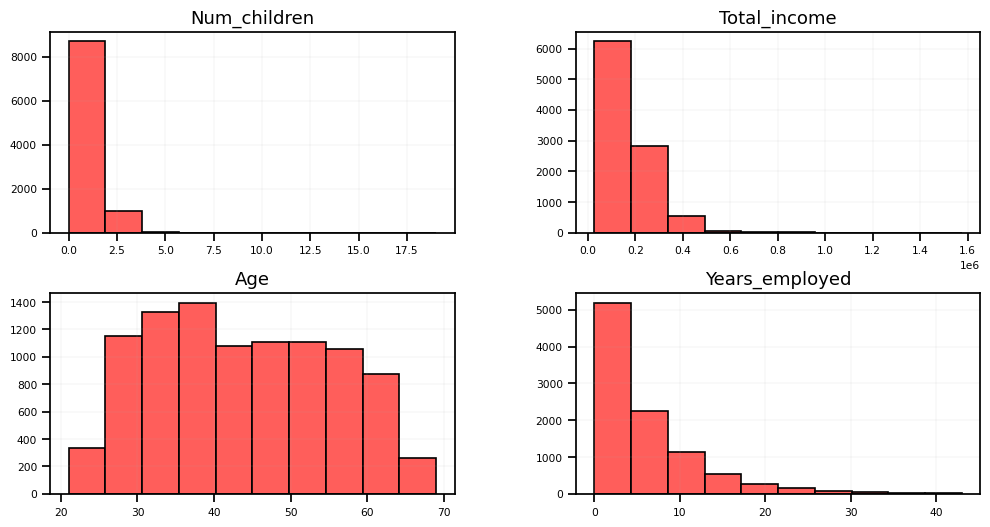

In [67]:
plt.figure(figsize=(10,10))

cols_to_plot = ["Num_children","Total_income","Age","Years_employed"]
new_df[cols_to_plot].hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)

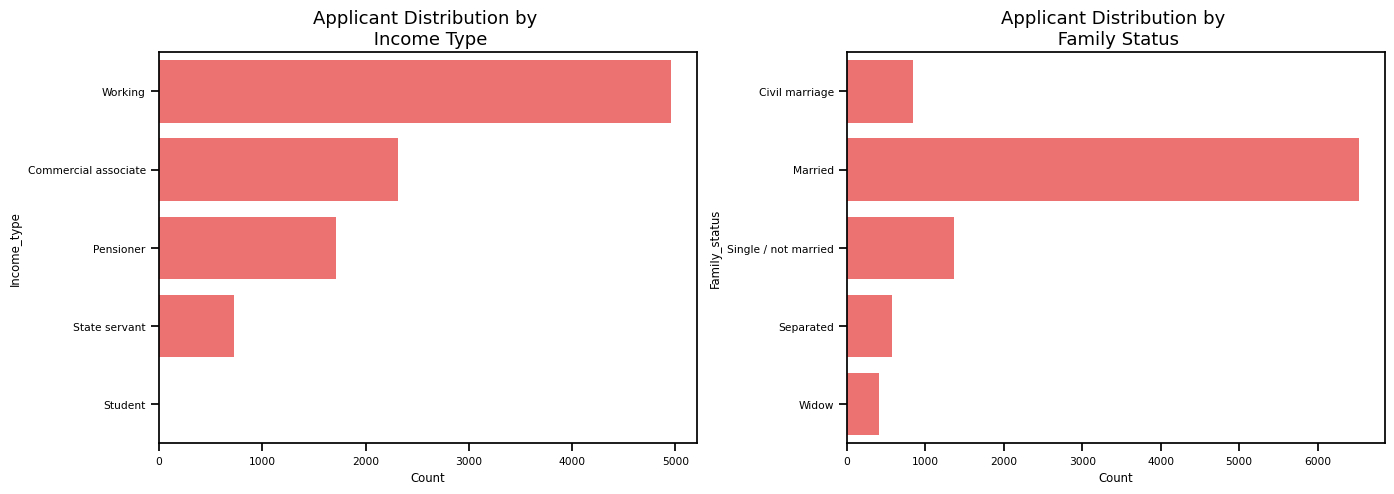

In [68]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=new_df.Income_type,linewidth=1.2, ax=axes[0])
g1.set_title("Applicant Distribution by \n Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=new_df.Family_status,linewidth=1.2, ax=axes[1])
g2.set_title("Applicant Distribution by \n Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

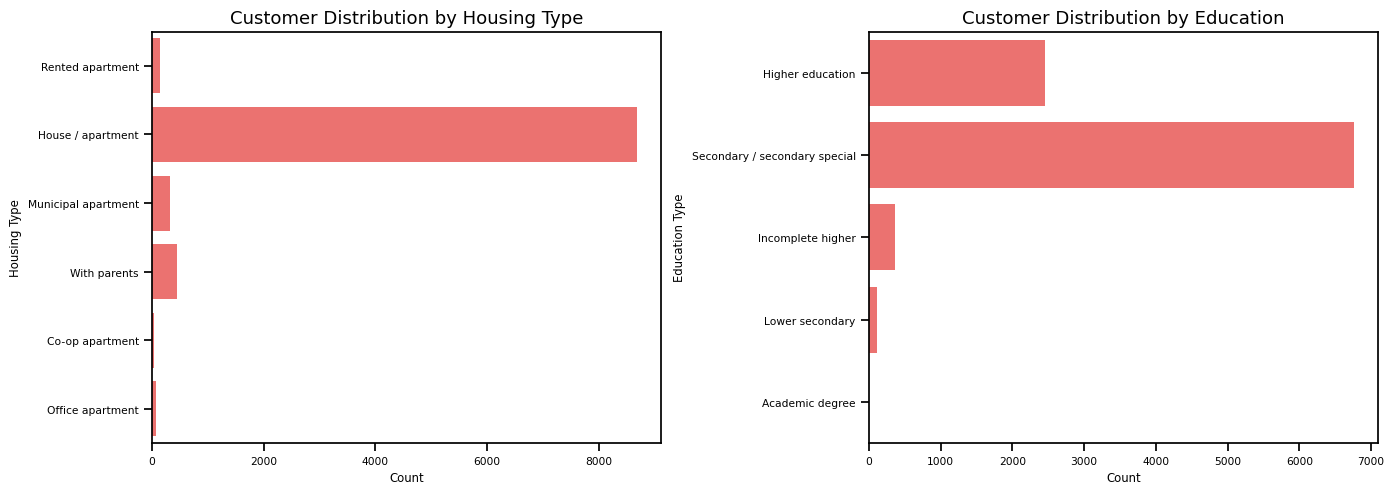

In [69]:
fig, axes = plt.subplots(1,2)

g1= sns.countplot(y=new_df.Housing_type,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")

g2= sns.countplot(y=new_df.Education_type, ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

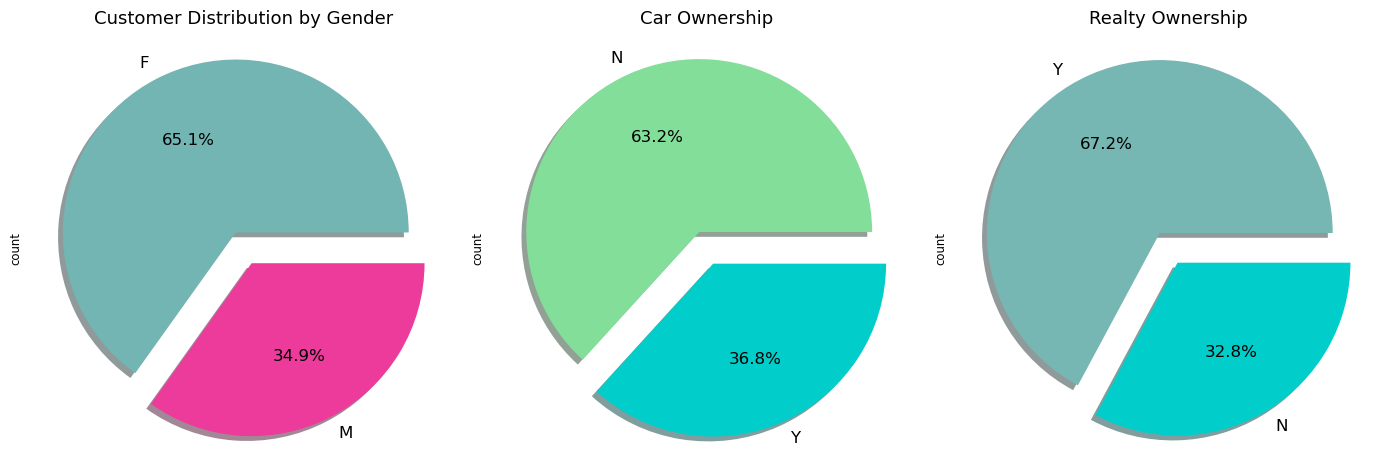

In [70]:
fig, axes = plt.subplots(1,3)

g1= new_df['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#73B5B3","#EC3B9A"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= new_df['Own_car'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#82DE99","#01CECB"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= new_df['Own_property'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#76B6B3","#01CECB"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

In [71]:
object_columns = new_df.columns[new_df.dtypes =='object'].tolist()
#object columns in dataset

unique_counts = pd.DataFrame.from_records([(col, new_df[object_columns][col].nunique()) for col in new_df[object_columns].columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])

unique_counts
#unique counts for object columns

,Column_Name,Num_Unique
0,Gender,2
1,Own_car,2
2,Own_property,2
3,Income_type,5
4,Education_type,5
5,Family_status,5
6,Housing_type,6
7,Occupation_type,19


In [72]:
# Checking unique values from Categorical Columns

for i in new_df.columns[(new_df.dtypes =='object').values].tolist():
    print(i,'\n')
    print(new_df[i].value_counts())
    print('-----------------------------------------------')

Gender 

Gender
F    6323
M    3386
Name: count, dtype: int64
-----------------------------------------------
Own_car 

Own_car
N    6139
Y    3570
Name: count, dtype: int64
-----------------------------------------------
Own_property 

Own_property
Y    6520
N    3189
Name: count, dtype: int64
-----------------------------------------------
Income_type 

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: count, dtype: int64
-----------------------------------------------
Education_type 

Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: count, dtype: int64
-----------------------------------------------
Family_status 

Family_status
Married                 6530
Single / not married    1359
Civil marriage           83

In [73]:
# Encode binary features
new_df["Gender"] =  new_df["Gender"].replace(['F','M'],[0,1])
new_df["Own_car"] = new_df["Own_car"].replace(["Y","N"],[1,0])
new_df["Own_property"] = new_df["Own_property"].replace(["Y","N"],[1,0])

In [74]:
new_df.head(2)

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.4
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.1


In [75]:
new_df.Income_type.unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [76]:
new_df["Is_Working"] = new_df["Income_type"].replace(["Working","Commercial associate","State servant","Pensioner","Student"],
                                            [1,1,1,0,0])

new_df["Marital_status"] = new_df["Family_status"].replace(["Civil marriage","Married","Single / not married",
                                "Separated","Widow"],[1,1,0,0,0])

In [77]:
new_df

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Other,2.0,1,15,33.0,0,12.4,1,1
1,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.1,1,1
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.4,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0,0,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0,0,0,Laborers,2.0,1,20,56.0,0,0.5,0,1
9705,5149055,0,0,1,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,0,Other,2.0,1,19,43.0,0,7.4,1,1
9706,5149729,1,1,1,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Other,2.0,1,21,52.0,0,4.7,1,1
9707,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,32,34.0,0,3.6,0,1


In [78]:
housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}

In [79]:
new_df["Housing_type"] = new_df['Housing_type'].map(housing_type)

In [80]:
new_df["Housing_type"].value_counts()

Housing_type
House / apartment    9261
With parents          448
Name: count, dtype: int64

In [81]:
family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}

new_df["Family_status"] = new_df["Family_status"].map(family_status)

In [82]:
new_df.Family_status.value_counts()

Family_status
Married    7366
Single     2343
Name: count, dtype: int64

In [83]:
education_type = {'Secondary / secondary special':'Secondary',
                     'Lower secondary':'Secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}

new_df["Education_type"] = new_df["Education_type"].map(education_type)

In [84]:
new_df.Education_type.value_counts()

Education_type
Secondary           6875
Higher education    2828
Academic degree        6
Name: count, dtype: int64

In [85]:
new_df["Household_Size"] = new_df["Num_children"] + new_df["Marital_status"].apply(lambda x: 2 if x==1 else 1)

In [86]:
new_df

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_Size
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,0,0,Other,2.0,1,15,33.0,0,12.4,1,1,2
1,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House / apartment,0,0,0,Security staff,2.0,0,29,59.0,0,3.1,1,1,2
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary,Single,House / apartment,0,1,1,Sales staff,1.0,0,4,52.0,0,8.4,1,0,1
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,0,0,0,Other,1.0,0,20,62.0,1,0.0,0,0,1
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,0,5,46.0,0,2.1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,0,0,0,0,180000.0,Pensioner,Secondary,Married,House / apartment,0,0,0,Laborers,2.0,1,20,56.0,0,0.5,0,1,2
9705,5149055,0,0,1,0,112500.0,Commercial associate,Secondary,Married,House / apartment,1,1,0,Other,2.0,1,19,43.0,0,7.4,1,1,2
9706,5149729,1,1,1,0,90000.0,Working,Secondary,Married,House / apartment,0,0,0,Other,2.0,1,21,52.0,0,4.7,1,1,2
9707,5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,0,1,1,Medicine staff,2.0,1,32,34.0,0,3.6,0,1,2


In [87]:
numerical_cols = ["Total_income","Age","Years_employed","Household_Size"]

fig = make_subplots(rows=2, cols=2, start_cell="bottom-left",
                   subplot_titles=("Income", "Age", "Experience", "Family Members Count"))

fig.add_trace(go.Box(x=new_df.Total_income, name='Income',boxmean=True),row=1,col=1)
fig.add_trace(go.Box(x=new_df.Age, name='Age', boxmean=True), row=1, col=2)
fig.add_trace(go.Box(x=new_df.Years_employed, name='Experience', boxmean=True), row=2, col=1)
fig.add_trace(go.Box(x=new_df.Household_Size, name="Family Member Count", boxmean=True),row=2, col=2)

fig.show()

In [88]:
new_df["Years_employed"].value_counts()

Years_employed
0.0     1697
0.5      130
0.6      117
0.3      115
1.1      112
        ... 
26.1       1
29.0       1
30.5       1
33.8       1
39.5       1
Name: count, Length: 351, dtype: int64

In [89]:
new_df["Household_Size"].value_counts()

Household_Size
2     5173
1     1957
3     1636
4      801
5      117
6       18
7        4
15       1
20       1
9        1
Name: count, dtype: int64

In [90]:
new_df[(new_df["Years_employed"]>=41)]

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_Size
2442,5037026,0,0,1,0,85500.0,Working,Secondary,Single,House / apartment,0,0,0,Other,1.0,0,10,59.0,0,41.3,1,0,1
2686,5041425,0,1,1,0,202500.0,State servant,Higher education,Single,House / apartment,0,1,0,Other,1.0,0,4,61.0,0,41.2,1,0,1
5475,5090311,0,1,1,0,162000.0,State servant,Secondary,Married,House / apartment,0,0,0,Other,2.0,0,17,61.0,0,41.7,1,1,2
7142,5112905,0,0,1,0,180000.0,Commercial associate,Secondary,Married,House / apartment,0,0,0,Medicine staff,2.0,0,16,63.0,0,43.0,1,1,2
9328,5148702,0,0,1,0,126000.0,Commercial associate,Secondary,Married,House / apartment,0,0,0,Core staff,2.0,0,57,62.0,0,42.9,1,1,2


In [91]:
new_df[(new_df['Household_Size']==20)]

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Target,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_Size
6840,5105054,0,0,1,19,112500.0,Working,Secondary,Single,House / apartment,1,1,0,Waiters/barmen staff,20.0,0,5,30.0,0,5.1,1,0,20


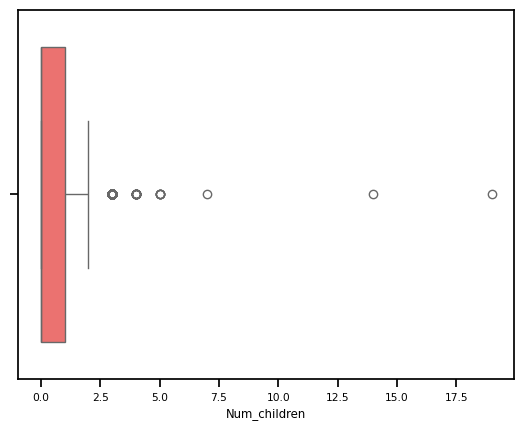

In [92]:
sns.boxplot(x=new_df['Num_children']);

In [93]:
new_df['Num_children'].value_counts()

Num_children
0     6819
1     1886
2      852
3      126
4       18
5        5
14       1
19       1
7        1
Name: count, dtype: int64

In [94]:
new_df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family', 'Target', 'Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_Size'],
      dtype='object')

In [95]:
new_df = new_df.loc[:,['ID', 'Gender', 'Own_car', 'Own_property', 'Num_children',
       'Total_income', 'Income_type', 'Education_type', 'Family_status',
       'Housing_type', 'Work_phone', 'Phone', 'Email', 'Occupation_type',
       'Num_family','Account_length', 'Age', 'Unemployed',
       'Years_employed', 'Is_Working', 'Marital_status', 'Household_Size','Target']]

In [96]:
new_df.head()

,ID,Gender,Own_car,Own_property,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Work_phone,Phone,Email,Occupation_type,Num_family,Account_length,Age,Unemployed,Years_employed,Is_Working,Marital_status,Household_Size,Target
0,5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,1,0,0,Other,2.0,15,33.0,0,12.4,1,1,2,1
1,5008806,1,1,1,0,112500.0,Working,Secondary,Married,House / apartment,0,0,0,Security staff,2.0,29,59.0,0,3.1,1,1,2,0
2,5008808,0,0,1,0,270000.0,Commercial associate,Secondary,Single,House / apartment,0,1,1,Sales staff,1.0,4,52.0,0,8.4,1,0,1,0
3,5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,0,0,0,Other,1.0,20,62.0,1,0.0,0,0,1,0
4,5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,1,1,1,Accountants,2.0,5,46.0,0,2.1,1,1,2,0


In [97]:
new_df.drop(["ID"],axis=1,inplace=True)

In [98]:
new_df.drop(["Email"],axis=1,inplace=True)

In [99]:
new_df.drop(["Phone"],axis=1,inplace=True)

In [100]:
new_df.drop(["Work_phone"],axis=1,inplace=True)

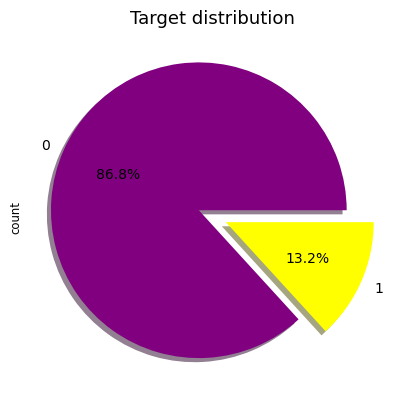

In [101]:
new_df['Target'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['purple', 'yellow'],textprops = {'fontsize':10}).set_title("Target distribution")

plt.show()

In [102]:
colname=[]
for x in new_df.columns:
    if new_df[x].dtype=='object':
        colname.append(x)
colname

['Income_type',
 'Education_type',
 'Family_status',
 'Housing_type',
 'Occupation_type']

In [103]:
#To check if there are any special characters in place of values
for i in new_df.columns:
    print({i:new_df[i].unique()})

{'Gender': array([1, 0], dtype=int64)}
{'Own_car': array([1, 0], dtype=int64)}
{'Own_property': array([1, 0], dtype=int64)}
{'Num_children': array([ 0,  1,  3,  2,  4,  5, 14, 19,  7], dtype=int64)}
{'Total_income': array([ 427500. ,  112500. ,  270000. ,  283500. ,  135000. ,  130500. ,
        157500. ,  405000. ,  211500. ,  360000. ,  126000. ,  315000. ,
        247500. ,  297000. ,  225000. ,  166500. ,  216000. ,  255150. ,
        148500. ,  202500. ,   94500. ,  450000. ,  180000. ,   90000. ,
        765000. ,  382500. ,  144000. ,  229500. ,  292500. ,   74250. ,
         40500. ,  337500. ,  193500. ,  267750. ,  139500. ,   67500. ,
        252000. ,  900000. ,  115290. ,  279000. ,   76500. ,  234000. ,
         81000. ,  108000. ,   99000. ,  198000. ,   45000. ,  238500. ,
        117000. ,  153000. , 1350000. ,  445500. ,  495000. ,   85500. ,
        306000. ,  562500. ,  189000. ,  328500. ,  310500. ,  540000. ,
        171000. ,  675000. ,  121500. ,   72000. ,   6

#### **Converting all Non-Numerical Columns to Numerical**


In [104]:
#Converting the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    new_df[x]=le.fit_transform(new_df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Income_type
mapping {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
Feature Education_type
mapping {'Academic degree': 0, 'Higher education': 1, 'Secondary': 2}
Feature Family_status
mapping {'Married': 0, 'Single': 1}
Feature Housing_type
mapping {'House / apartment': 0, 'With parents': 1}
Feature Occupation_type
mapping {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Other': 12, 'Private service staff': 13, 'Realty agents': 14, 'Sales staff': 15, 'Secretaries': 16, 'Security staff': 17, 'Waiters/barmen staff': 18}


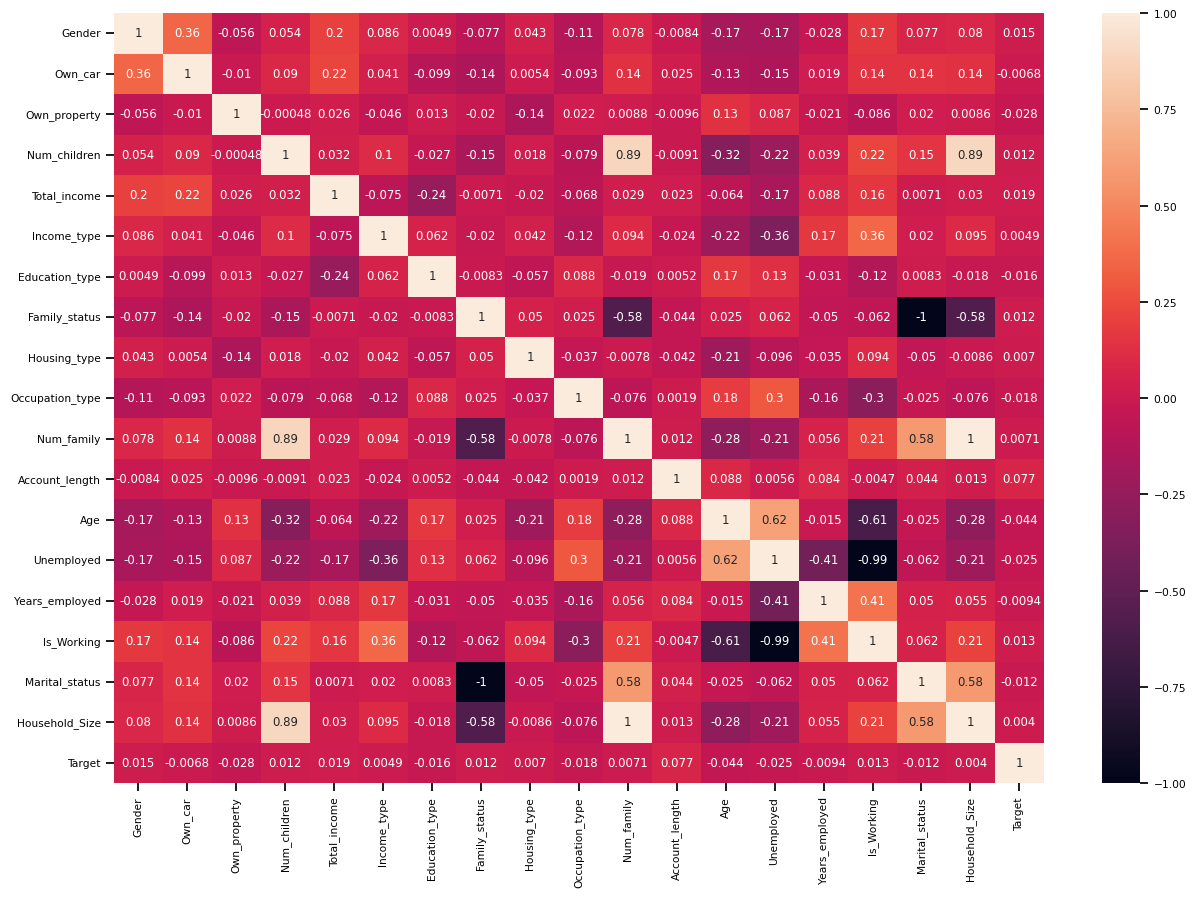

In [105]:
plt.figure(figsize=(15, 10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show();

In [106]:
new_df.drop('Num_family', axis=1, inplace=True)

In [107]:
new_df.drop('Num_children', axis=1, inplace=True)

In [108]:
new_df.drop('Unemployed', axis=1, inplace=True)

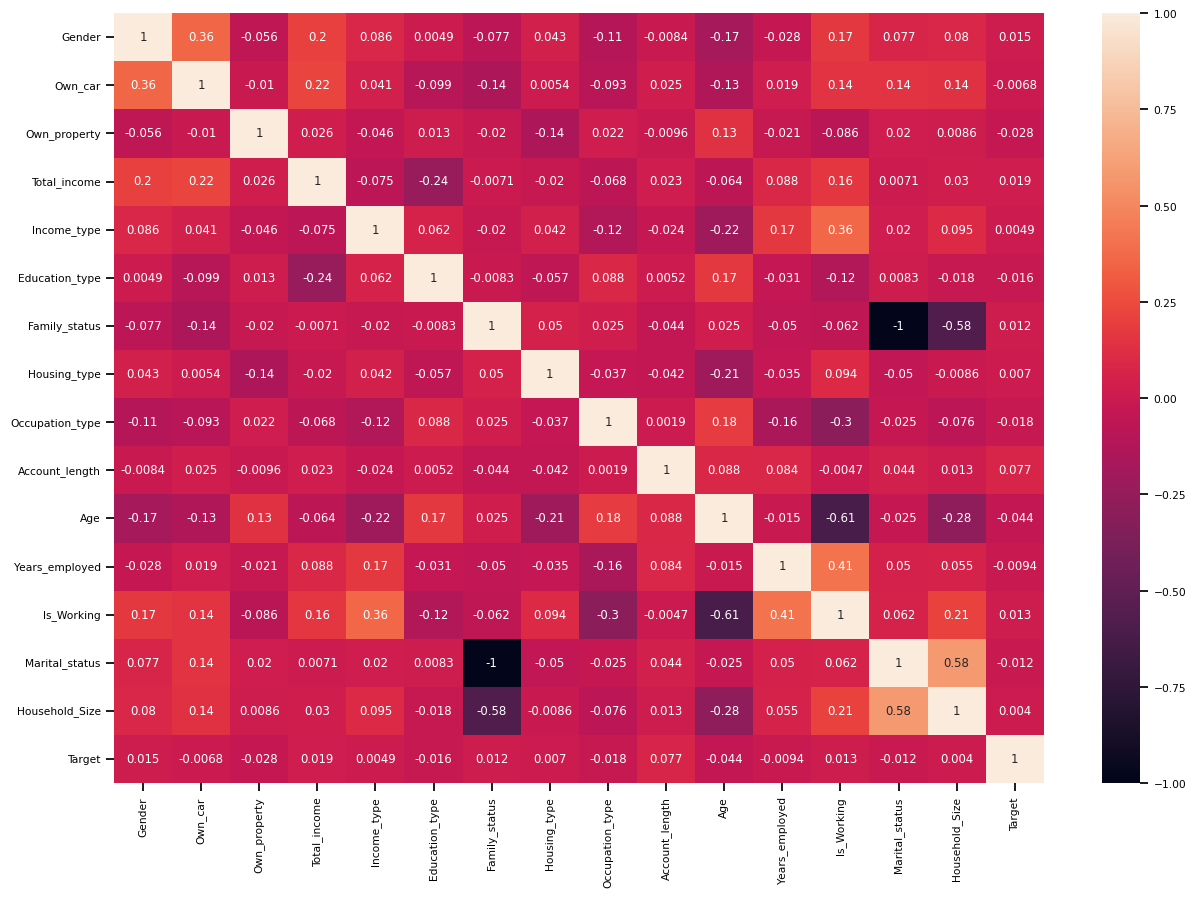

In [109]:
plt.figure(figsize=(15, 10))
corr=new_df.corr()
sns.heatmap(corr,annot=True)
plt.show();

In [110]:
new_df.drop(["Family_status"],axis=1,inplace=True)

In [111]:
new_df.shape

(9709, 15)

In [112]:
new_df

,Gender,Own_car,Own_property,Total_income,Income_type,Education_type,Housing_type,Occupation_type,Account_length,Age,Years_employed,Is_Working,Marital_status,Household_Size,Target
0,1,1,1,427500.0,4,1,0,12,15,33.0,12.4,1,1,2,1
1,1,1,1,112500.0,4,2,0,17,29,59.0,3.1,1,1,2,0
2,0,0,1,270000.0,0,2,0,15,4,52.0,8.4,1,0,1,0
3,0,0,1,283500.0,1,1,0,12,20,62.0,0.0,0,0,1,0
4,1,1,1,270000.0,4,1,0,0,5,46.0,2.1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,180000.0,1,2,0,8,20,56.0,0.5,0,1,2,1
9705,0,0,1,112500.0,0,2,0,12,19,43.0,7.4,1,1,2,1
9706,1,1,1,90000.0,4,2,0,12,21,52.0,4.7,1,1,2,1
9707,0,0,1,157500.0,1,1,0,11,32,34.0,3.6,0,1,2,1


In [113]:
new_df.head()

,Gender,Own_car,Own_property,Total_income,Income_type,Education_type,Housing_type,Occupation_type,Account_length,Age,Years_employed,Is_Working,Marital_status,Household_Size,Target
0,1,1,1,427500.0,4,1,0,12,15,33.0,12.4,1,1,2,1
1,1,1,1,112500.0,4,2,0,17,29,59.0,3.1,1,1,2,0
2,0,0,1,270000.0,0,2,0,15,4,52.0,8.4,1,0,1,0
3,0,0,1,283500.0,1,1,0,12,20,62.0,0.0,0,0,1,0
4,1,1,1,270000.0,4,1,0,0,5,46.0,2.1,1,1,2,0


In [114]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Total_income     9709 non-null   float64
 4   Income_type      9709 non-null   int32  
 5   Education_type   9709 non-null   int32  
 6   Housing_type     9709 non-null   int32  
 7   Occupation_type  9709 non-null   int32  
 8   Account_length   9709 non-null   int64  
 9   Age              9709 non-null   float64
 10  Years_employed   9709 non-null   float64
 11  Is_Working       9709 non-null   int64  
 12  Marital_status   9709 non-null   int64  
 13  Household_Size   9709 non-null   int64  
 14  Target           9709 non-null   int32  
dtypes: float64(3), int32(5), int64(7)
memory usage: 948.3 KB


### **Creating X & Y variables for predictions**

In [115]:
#Create X & Y
X = new_df.iloc[:,0:-1]
Y = new_df.iloc[:,-1]

In [116]:
print(X.shape)
print(Y.shape)

(9709, 14)
(9709,)


### **Scaling the X variables**
As there are different feature variables in X, it can have a possibility of giving more importance to the variables having greater range and give less important to variables having small range which is not suitable.  

So to overcome this problem scaling is done on the all variables in X, as it will bring all the variables in a same range

In [117]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)


In [118]:
from sklearn.model_selection import train_test_split  
#<1000=in range of 80-20  &  >1000=in range of 70-30

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)


In [119]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7767, 14)
(7767,)
(1942, 14)
(1942,)


#### Logistic Regression:

In [120]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

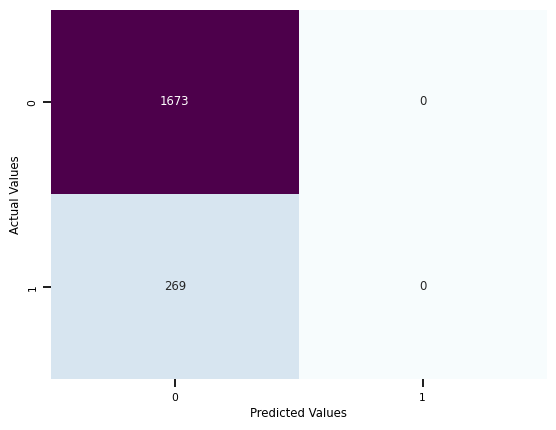

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the model:  0.8614830072090628


In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### KNN

In [122]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

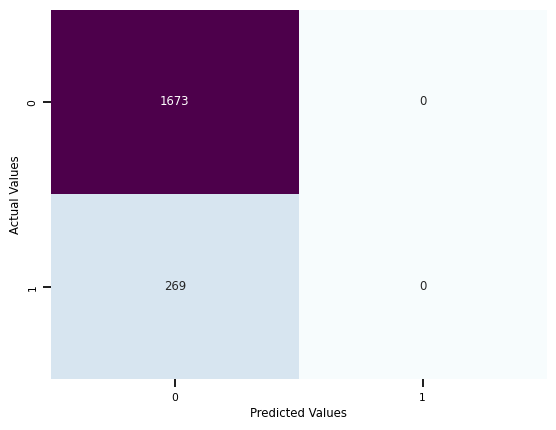

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1673
           1       0.00      0.00      0.00       269

    accuracy                           0.86      1942
   macro avg       0.43      0.50      0.46      1942
weighted avg       0.74      0.86      0.80      1942

Accuracy of the model:  0.8614830072090628


In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()


print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [124]:
#predicting using the Decision Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="entropy",max_depth=15,random_state=10)


#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

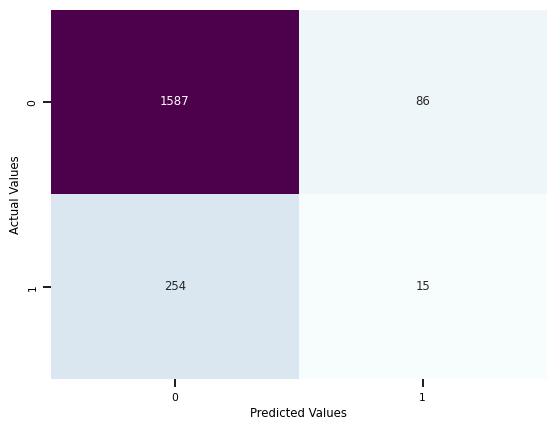

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1673
           1       0.15      0.06      0.08       269

    accuracy                           0.82      1942
   macro avg       0.51      0.50      0.49      1942
weighted avg       0.76      0.82      0.79      1942

Accuracy of the model:  0.8249227600411947


In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [126]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=32,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

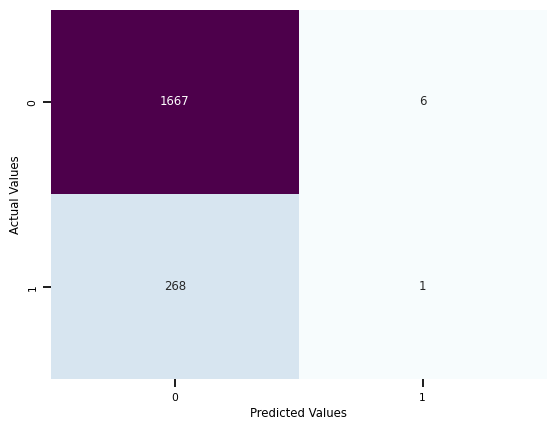

Classification report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1673
           1       0.14      0.00      0.01       269

    accuracy                           0.86      1942
   macro avg       0.50      0.50      0.47      1942
weighted avg       0.76      0.86      0.80      1942

Accuracy of the model:  0.858908341915551


In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [128]:
y=new_df["Target"]
x=new_df.drop(["Target"],axis=1)

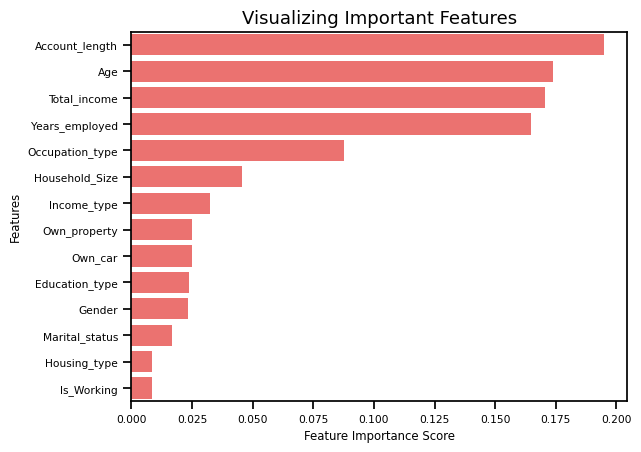

In [129]:
feature_imp = pd.Series(model_RandomForest.feature_importances_,index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [130]:
new_df.drop(["Household_Size"],axis=1,inplace=True)

In [131]:
new_df.drop(["Own_car"],axis=1,inplace=True)

In [132]:
new_df.drop(["Own_property"],axis=1,inplace=True)

In [133]:
new_df.drop(["Housing_type"],axis=1,inplace=True)

In [134]:
#Create X & Y
X = new_df.iloc[:,0:-1]
Y = new_df.iloc[:,-1]

In [135]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)


In [136]:
from sklearn.model_selection import train_test_split  
#<1000=in range of 80-20  &  >1000=in range of 70-30

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)


In [137]:
?ExtraTreesClassifier

Object `ExtraTreesClassifier` not found.


In [138]:
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=101,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train,Y_train)

Y_pred = model_ExtraTrees.predict(X_test)

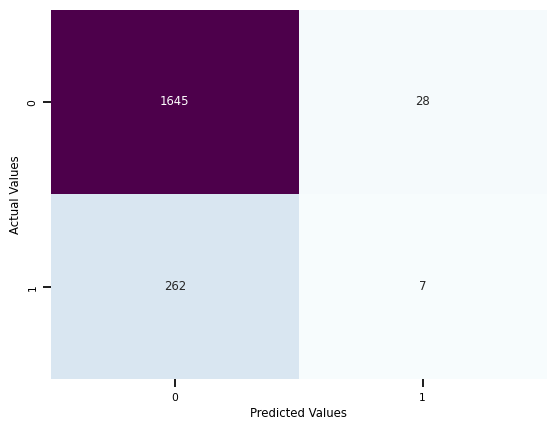

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1673
           1       0.20      0.03      0.05       269

    accuracy                           0.85      1942
   macro avg       0.53      0.50      0.48      1942
weighted avg       0.77      0.85      0.80      1942

Accuracy of the model:  0.850669412976313


In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


In [140]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_AdaBoost = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=10),
                                    n_estimators=522,
                                    random_state=10)

# Fit the model on the data and predict the values
model_AdaBoost.fit(X_train, Y_train)
Y_pred = model_AdaBoost.predict(X_test)

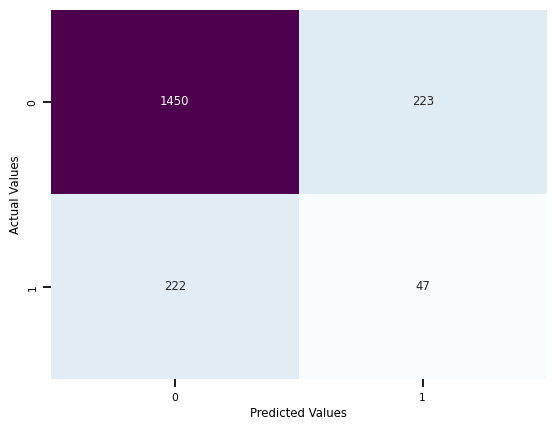

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1673
           1       0.17      0.17      0.17       269

    accuracy                           0.77      1942
   macro avg       0.52      0.52      0.52      1942
weighted avg       0.77      0.77      0.77      1942

Accuracy of the model:  0.770854788877446


In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [142]:
!pip install xgboost

In [143]:
?XGBClassifier

Object `XGBClassifier` not found.


In [144]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=20000,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train,Y_train)

Y_pred=model_XGBoost.predict(X_test)

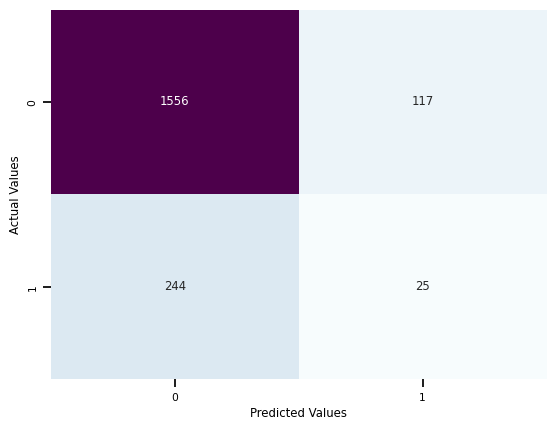

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      1673
           1       0.18      0.09      0.12       269

    accuracy                           0.81      1942
   macro avg       0.52      0.51      0.51      1942
weighted avg       0.77      0.81      0.79      1942

Accuracy of the model:  0.814109165808445


In [145]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

### **SMOTE**

In [146]:
!pip install imblearn

In [147]:
import sklearn.utils._param_validation

In [148]:
#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
#!pip install imblearn

In [149]:
#pip install --upgrade scikit-learn imbalanced-learn

In [150]:
import imblearn

In [151]:
X=new_df.values[:,:-1]
Y=new_df.values[:,-1]

In [152]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [153]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)


In [154]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))

# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))

print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  1014
Before OverSampling, counts of label '0':  6753
After OverSampling, the shape of train_X:  (13506, 10)
After OverSampling, the shape of train_y:  (13506,)
After OverSampling, counts of label '1':  6753
After OverSampling, counts of label '0':  6753


In [155]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=125,random_state=10)


#fit the model on the data and predict the values
model_RandomForest.fit(X_train_res,Y_train_res)

Y_pred=model_RandomForest.predict(X_test)

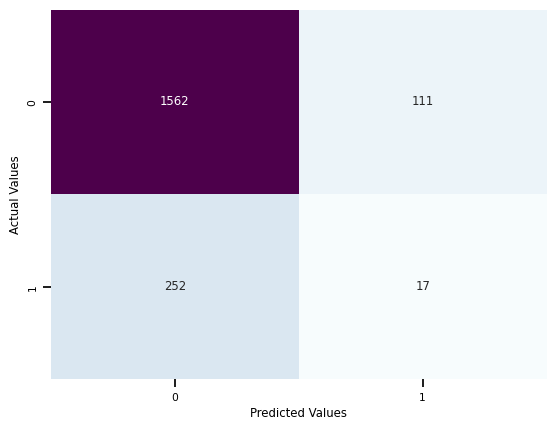

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      1673
         1.0       0.13      0.06      0.09       269

    accuracy                           0.81      1942
   macro avg       0.50      0.50      0.49      1942
weighted avg       0.76      0.81      0.78      1942

Accuracy of the model:  0.8130792996910402


In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)


In [157]:
#predicting using the Extra_Trees_Classifier
from sklearn.ensemble import ExtraTreesClassifier

model_ExtraTrees = ExtraTreesClassifier(n_estimators=75,random_state=10)

#fit the model on the data and predict the values
model_ExtraTrees.fit(X_train_res,Y_train_res)

Y_pred = model_ExtraTrees.predict(X_test)

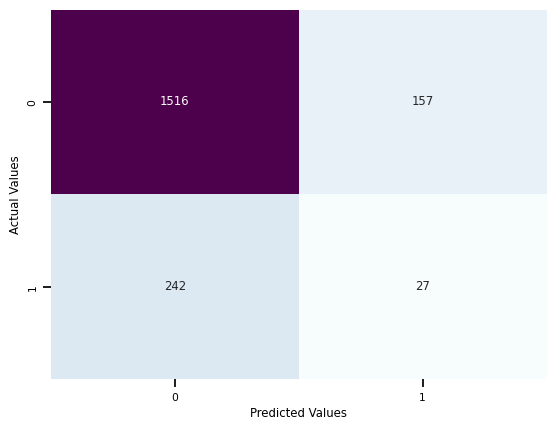

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1673
         1.0       0.15      0.10      0.12       269

    accuracy                           0.79      1942
   macro avg       0.50      0.50      0.50      1942
weighted avg       0.76      0.79      0.78      1942

Accuracy of the model:  0.7945417095777549


In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [159]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_AdaBoost = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=10),
                                    n_estimators=441,
                                    random_state=10)

# Fit the model on the data and predict the values
model_AdaBoost.fit(X_train_res, Y_train_res)
Y_pred = model_AdaBoost.predict(X_test)

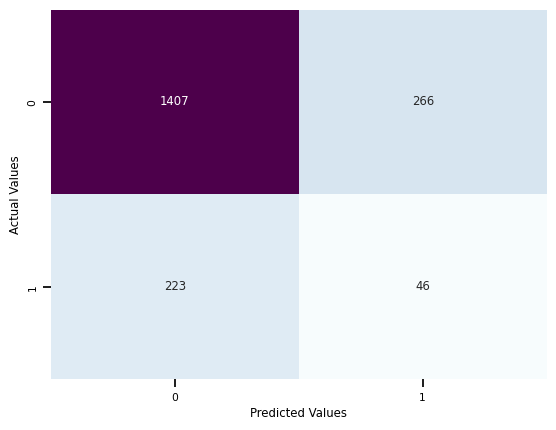

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      1673
         1.0       0.15      0.17      0.16       269

    accuracy                           0.75      1942
   macro avg       0.51      0.51      0.51      1942
weighted avg       0.76      0.75      0.76      1942

Accuracy of the model:  0.7481977342945417


In [160]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [161]:
from xgboost import XGBClassifier
model_XGBoost=XGBClassifier(n_estimators=5000,
                              random_state=10)

#fit the model on the data and predict the values
model_XGBoost.fit(X_train_res,Y_train_res)

Y_pred=model_XGBoost.predict(X_test)

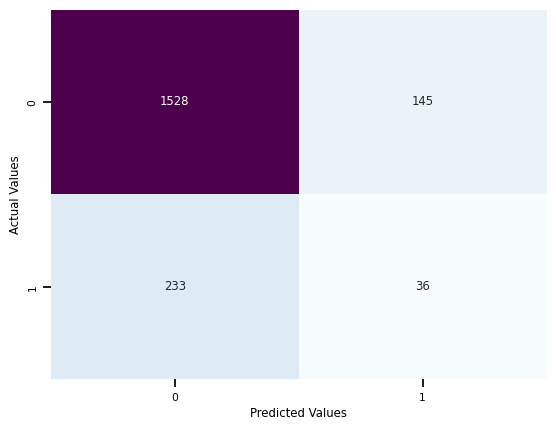

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1673
         1.0       0.20      0.13      0.16       269

    accuracy                           0.81      1942
   macro avg       0.53      0.52      0.52      1942
weighted avg       0.78      0.81      0.79      1942

Accuracy of the model:  0.8053553038105047


In [162]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [163]:
from sklearn.linear_model import LogisticRegression
#create a model object
classifier = LogisticRegression()

#train the model object
classifier.fit(X_train_res,Y_train_res)

Y_pred=classifier.predict(X_test)

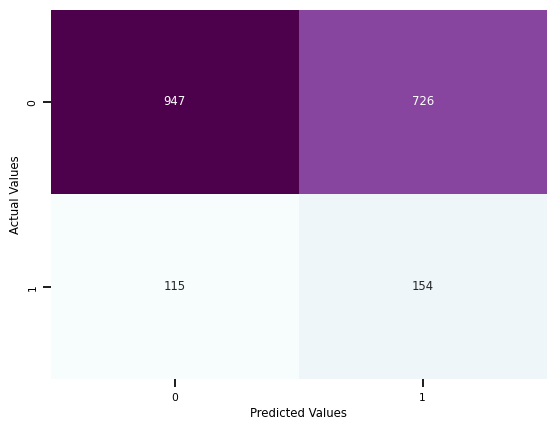

Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.57      0.69      1673
         1.0       0.17      0.57      0.27       269

    accuracy                           0.57      1942
   macro avg       0.53      0.57      0.48      1942
weighted avg       0.79      0.57      0.63      1942

Accuracy of the model:  0.566941297631308


In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [165]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=11,
                              metric='manhattan')

#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train_res,Y_train_res)

Y_pred=model_KNN.predict(X_test)

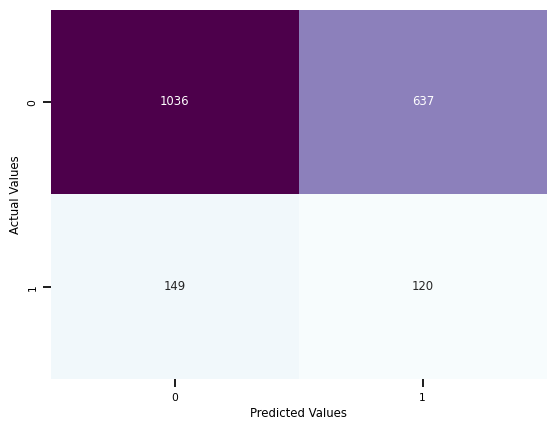

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.62      0.72      1673
         1.0       0.16      0.45      0.23       269

    accuracy                           0.60      1942
   macro avg       0.52      0.53      0.48      1942
weighted avg       0.78      0.60      0.66      1942

Accuracy of the model:  0.5952626158599382


In [166]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [167]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define the initial model with the maximum number of estimators
initial_n_estimators = 200
model_AdaBoost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=10),
    n_estimators=initial_n_estimators,
    random_state=10
)

# Split your training data into training and validation sets
X_train_sub, X_val, Y_train_sub, Y_val = train_test_split(X_train_res, Y_train_res, test_size=0.2, random_state=42)

# Fit the initial model on the training subset
model_AdaBoost.fit(X_train_sub, Y_train_sub)

# Initialize variables for early stopping
best_val_score = -np.inf
n_no_improvement = 0
early_stop_rounds = 10  # number of rounds with no improvement to stop training early
best_n_estimators = initial_n_estimators

# Iterate over staged predictions to implement early stopping
for i, y_pred in enumerate(model_AdaBoost.staged_predict(X_val)):
    val_score = accuracy_score(Y_val, y_pred)
    if val_score > best_val_score:
        best_val_score = val_score
        n_no_improvement = 0
        best_n_estimators = i + 1
    else:
        n_no_improvement += 1
    if n_no_improvement >= early_stop_rounds:
        print(f"Early stopping at iteration {i + 1}")
        break

# Train the final model using the best number of estimators
final_model_AdaBoost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=10),
    n_estimators=best_n_estimators,
    random_state=10
)
final_model_AdaBoost.fit(X_train_res, Y_train_res)

# Predict on the test set
Y_pred = final_model_AdaBoost.predict(X_test)
print(f"Test Accuracy: {accuracy_score(Y_test, Y_pred)}")

Early stopping at iteration 12
Test Accuracy: 0.8135942327497425


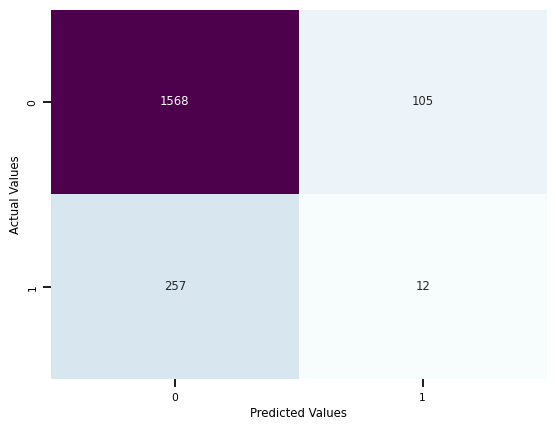

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1673
         1.0       0.10      0.04      0.06       269

    accuracy                           0.81      1942
   macro avg       0.48      0.49      0.48      1942
weighted avg       0.75      0.81      0.78      1942

Accuracy of the model:  0.8135942327497425


In [168]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


param_grid = {
    'n_estimators': [50, 100, 200,555,2000,2324,4545,9000],
    'learning_rate': [0.01, 0.1,0.5,0.8]
}


xg_boost = XGBClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=10),  # Base estimator
    random_state=10
)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xg_boost,
    param_grid=param_grid,
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_res, Y_train_res)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best estimator for predictions
best_model = grid_search.best_estimator_
Y_pred = best_model.predict(X_test)


Best parameters: {'learning_rate': 0.01, 'n_estimators': 4545}
Best score: 0.8945104905357585


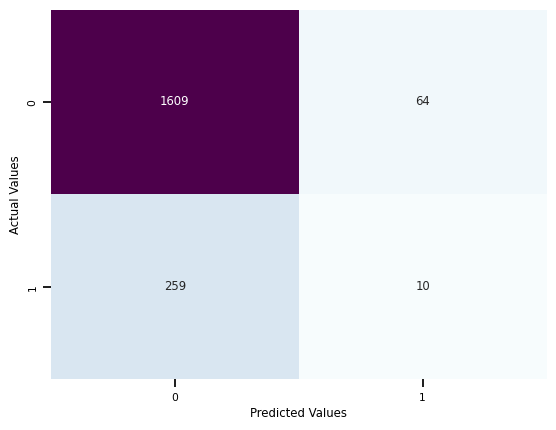

Classification report:
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      1673
         1.0       0.14      0.04      0.06       269

    accuracy                           0.83      1942
   macro avg       0.50      0.50      0.48      1942
weighted avg       0.76      0.83      0.79      1942

Accuracy of the model:  0.833676622039135


In [170]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

In [171]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define the initial model with the maximum number of estimators
initial_n_estimators = 200
model_GradientBoosting = GradientBoostingClassifier(
    n_estimators=initial_n_estimators,
    random_state=10
)

# Split your training data into training and validation sets
X_train_sub, X_val, Y_train_sub, Y_val = train_test_split(X_train_res, Y_train_res, test_size=0.2, random_state=42)

# Fit the initial model on the training subset
model_GradientBoosting.fit(X_train_sub, Y_train_sub)

# Initialize variables for early stopping
best_val_score = -np.inf
n_no_improvement = 0
early_stop_rounds = 10  # number of rounds with no improvement to stop training early
best_n_estimators = initial_n_estimators

# Iterate over staged predictions to implement early stopping
for i, y_pred in enumerate(model_GradientBoosting.staged_predict(X_val)):
    val_score = accuracy_score(Y_val, y_pred)
    if val_score > best_val_score:
        best_val_score = val_score
        n_no_improvement = 0
        best_n_estimators = i + 1
    else:
        n_no_improvement += 1
    if n_no_improvement >= early_stop_rounds:
        print(f"Early stopping at iteration {i + 1}")
        break

# Train the final model using the best number of estimators
final_model_GradientBoosting = GradientBoostingClassifier(
    n_estimators=best_n_estimators,
    random_state=10
)
final_model_GradientBoosting.fit(X_train_res, Y_train_res)

# Predict on the test set
Y_pred = final_model_GradientBoosting.predict(X_test)
print(f"Test Accuracy: {accuracy_score(Y_test, Y_pred)}")


Early stopping at iteration 148
Test Accuracy: 0.7914521112255407


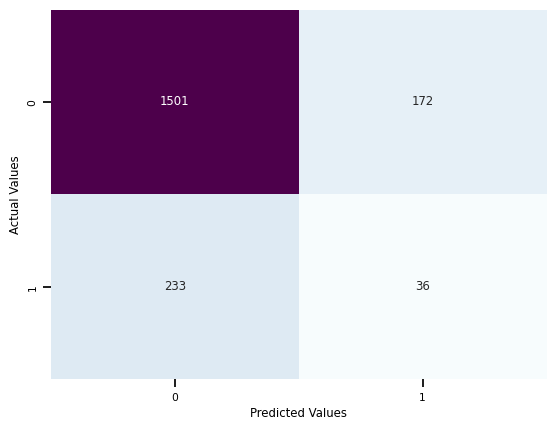

Classification report:
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1673
         1.0       0.17      0.13      0.15       269

    accuracy                           0.79      1942
   macro avg       0.52      0.52      0.52      1942
weighted avg       0.77      0.79      0.78      1942

Accuracy of the model:  0.7914521112255407


In [172]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cfm, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

## Key Insights:





* **Problem Automation**: The core objective is to develop an automatic credit card approval risk predictor, mimicking the processes used by financial institutions. This aims to streamline a traditionally manual, time-consuming, and error-prone task.
* **Data Preprocessing**: A significant step involved converting non-numerical (categorical) data into a numerical format suitable for machine learning models. This was achieved using `LabelEncoder`.
    * **Categorical Mappings**: Specific mappings were applied to various features:
        * `Income_type`: 'Commercial associate' (0), 'Pensioner' (1), 'State servant' (2), 'Student' (3), 'Working' (4).
        * `Education_type`: 'Academic degree' (0), 'Higher education' (1), 'Secondary' (2).
        * `Family_status`: 'Married' (0), 'Single' (1).
        * `Housing_type`: 'House / apartment' (0), 'With parents' (1).
        * `Occupation_type`: Various occupations mapped to numerical values (e.g., 'Accountants' to 0, 'Waiters/barmen staff' to 18).
* **Model Evaluation Metrics**: The project utilizes standard machine learning evaluation metrics to assess the model's performance, including:
    * Confusion Matrix
    * Accuracy Score
    * Classification Report
* **Model Performance**: The developed model achieved an accuracy of approximately 79.15% (0.7914521112255407).


## Conclusion:



The "Credit Card Approval Risk Predictor" project successfully demonstrates the application of machine learning to automate and enhance the efficiency of credit card application processing. By transforming complex, non-numerical applicant data into a quantifiable format, the model is able to learn patterns that predict approval risk. The reported accuracy of around 79.15% suggests that the model has a reasonably good capability in classifying credit card applications, thereby reducing the need for extensive manual review and minimizing potential human errors. The use of metrics like the confusion matrix and classification report indicates a thorough evaluation approach, providing insights into the model's performance beyond just overall accuracy. This automation can lead to faster decision-making and a more standardized approval process for banks.